In [6]:
import pandas as pd
import os
var=pd.read_csv("C:/Users/06650/Lab 3 part 3/salaries.csv")
var.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Business Intelligence Engineer,202800,USD,202800,US,0,US,L
1,2023,SE,FT,Business Intelligence Engineer,104300,USD,104300,US,0,US,L
2,2023,MI,FT,Data Manager,60000,GBP,73824,GB,0,GB,M
3,2023,MI,FT,Data Manager,55000,GBP,67672,GB,0,GB,M
4,2023,SE,FT,Data Scientist,290000,USD,290000,US,0,US,M



MultiOutputClassifier efficiency evaluation for label 'experience_level':
Accuracy: 0.61
Recall: 0.61
F1-score: 0.59

MultiOutputClassifier efficiency evaluation for label 'employee_residence':
Accuracy: 0.96
Recall: 0.96
F1-score: 0.95

MultiOutputClassifier efficiency evaluation for label 'company_size':
Accuracy: 0.88
Recall: 0.88
F1-score: 0.87


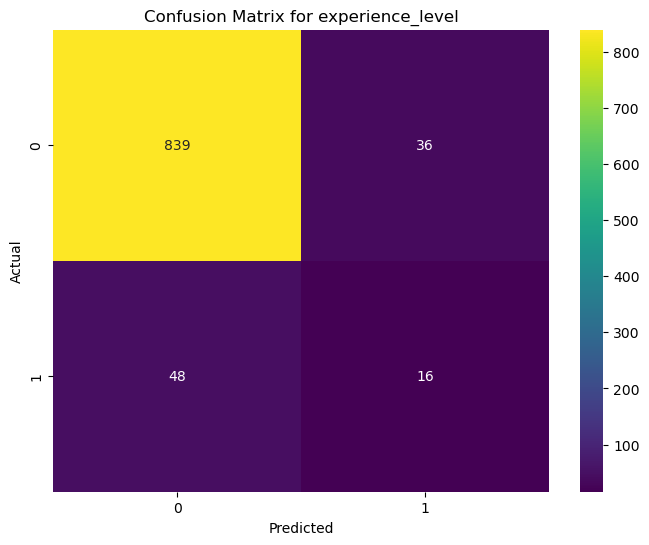

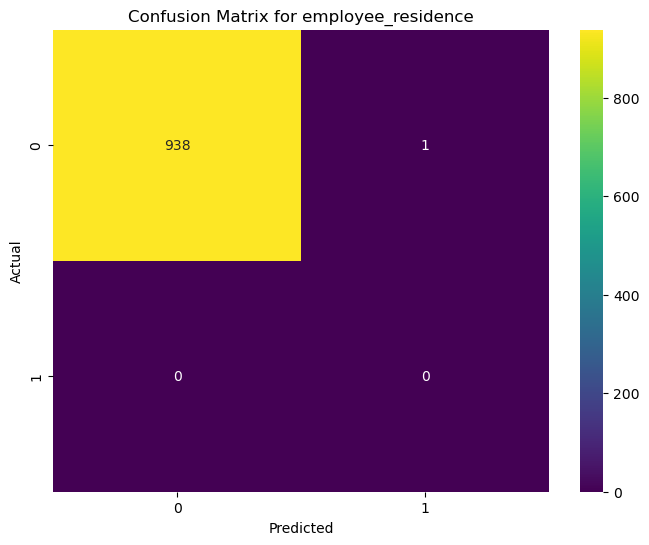

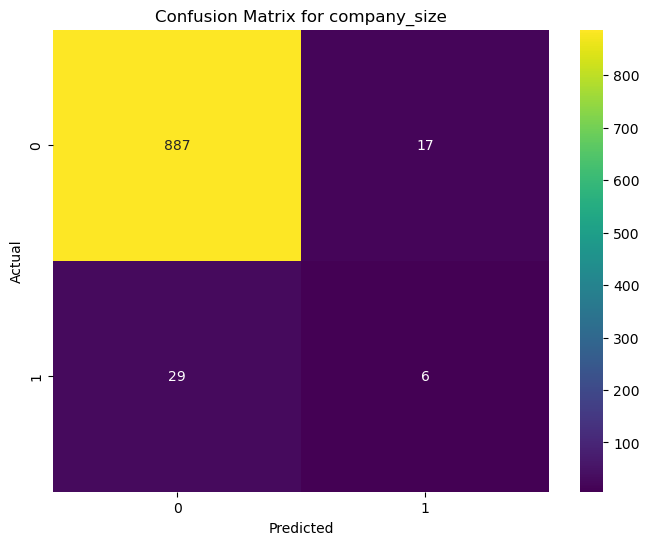

In [10]:
import pandas as pd
import seaborn as sns
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


def remove_duplicates(df):
    df = df.drop_duplicates()
    return df

data = pd.read_csv("C:/Users/06650/Lab 3 part 3/salaries.csv")

data = remove_duplicates(data)

data = data.fillna(data.mean())

categorical_features = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']

label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

target = ['experience_level', 'employee_residence', 'company_size']
y = data[target]
predictors = [col for col in data.columns if col not in target]
X = data[predictors]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model = MultiOutputClassifier(RandomForestClassifier(random_state=13))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

for i in range(y_test.shape[1]):
    label = y_test.columns[i]
    accuracy = accuracy_score(y_test[label], y_pred[:, i])
    precision = precision_score(y_test[label], y_pred[:, i], average='weighted')
    recall = recall_score(y_test[label], y_pred[:, i], average='weighted')
    f1 = f1_score(y_test[label], y_pred[:, i], average='weighted')

    print(f"\nMultiOutputClassifier efficiency evaluation for label '{label}':")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")

for i, target_col in enumerate(target):
    conf_matrix = multilabel_confusion_matrix(y_test[target_col], y_pred[:, i])
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix[i], annot=True, fmt='d', cmap='viridis')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {target_col}')
    plt.show()